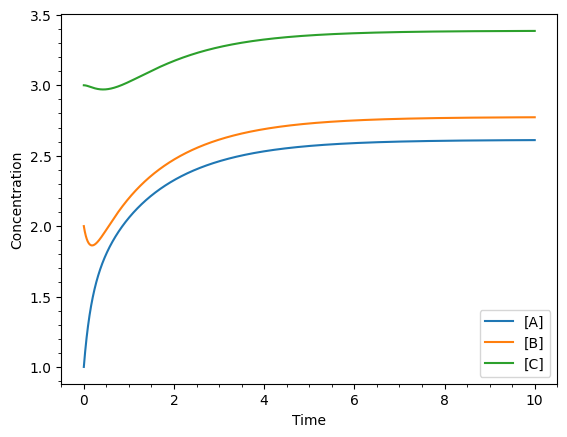

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def dEdt(t, E, k1, k2, k3, r_a, r_c, a_tild_0, c_tild_0):
    a, b, c = E
    return [k1*(b - a) + k2*(b**2 - a*b) - r_a*a + a_tild_0*r_a,
            k1*(a - b) + k2*(a*b - b**2) + k3*(c - b),
            k3*(b - c) - r_c*c + c_tild_0*r_c]
a0 = 1; b0 = 2; c0 = 3; E0 = (a0, b0, c0)
r_a = 1; r_c = 1; a_tild_0 = 2; c_tild_0 = 4
t = np.linspace(0, 10, 10000)

sol = odeint(dEdt, y0 = E0, t = t, args = (1, 1, 1, r_a, r_c, a_tild_0, c_tild_0), tfirst=True) 

plt.plot(t, sol.T[0], label = "[A]")
plt.plot(t, sol.T[1], label = "[B]")
plt.plot(t, sol.T[2], label = "[C]")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.minorticks_on()
plt.show()
